# Loan Default Prediction using ANN Keras

LendingClub Dataset from Kaggle:** https://www.kaggle.com/wordsforthewise/lending-club


### Overview 

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict whether or not a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

<br>
<br>

**Overview Data**

In [657]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [658]:
LendingClub = pd.read_csv('../DATA/lending_club_loan_two.csv')
LendingClub.head().T

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


In [659]:
LendingClub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<br>

## Exploratory Data Analysis

Let's get an overview on varriables, statistics summary.
The response variable is loan_status (Current status of the loan).

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

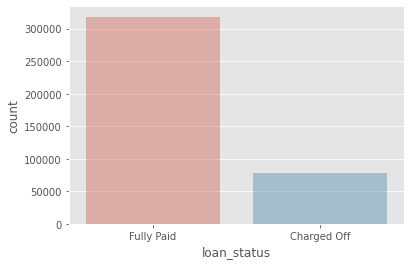

In [660]:
plt.style.use('ggplot')
sns.countplot(LendingClub['loan_status'], alpha = 0.4)

Another important variable is loan_amnt (The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.)

<AxesSubplot:>

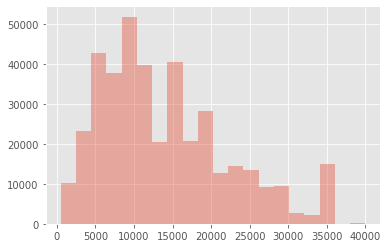

In [661]:
LendingClub['loan_amnt'].hist( alpha = 0.4, bins = 20)

Let's explore correlation between the continuous feature variables. 

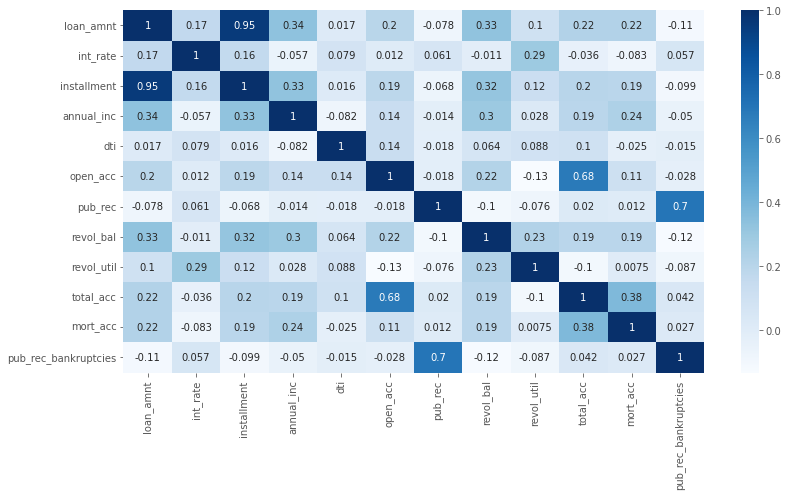

In [662]:
plt.figure(figsize=(12,7))
sns.heatmap(LendingClub.corr(), annot=True, cmap='Blues')
plt.tight_layout()

There is a strong correlation between loan_amt and installment (corr = 0.95 from the heatmap). Lets take a scatter plot for these 2 variables.

<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

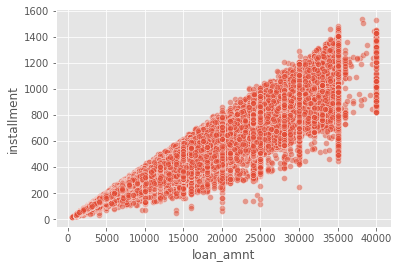

In [663]:
sns.scatterplot(data = LendingClub, x = 'loan_amnt', y = 'installment', alpha = 0.5)

This makes sense since installment is the monthly payment from the total loan amounts. 

Lets plot boxlot between loan_status and loan_amnt. 



<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

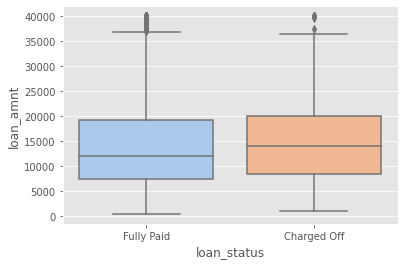

In [664]:
sns.boxplot(data = LendingClub, x = 'loan_status', y = 'loan_amnt', palette='pastel')

It seems there is no significant difference of loan amount between good borrower and bad borrower, which is pretty interesting.

let's check the other potential variables.

Text(0.5, 1.0, 'grade countplot')

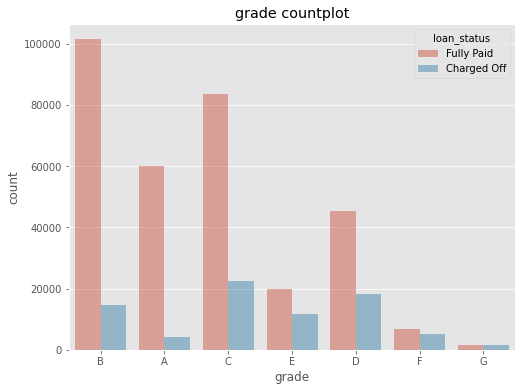

In [665]:
plt.figure(figsize=(8,6))
sns.countplot(data = LendingClub, x = 'grade', hue = 'loan_status', alpha = 0.5) 
plt.title('grade countplot')

In [666]:
LendingClub['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

Text(0.5, 1.0, 'subgrade countplot')

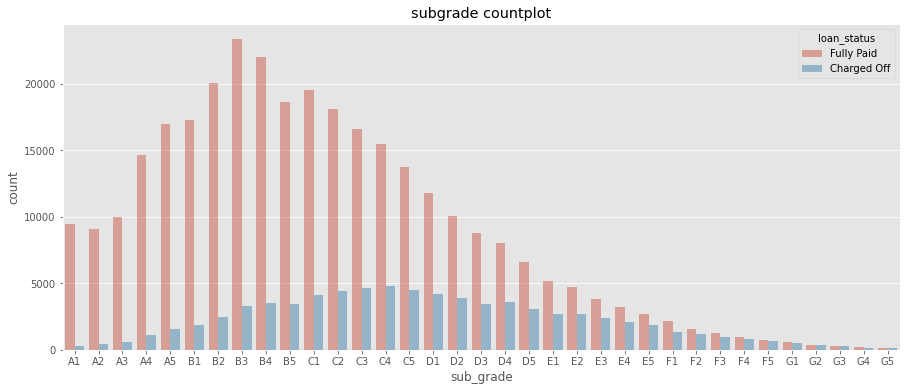

In [667]:
plt.figure(figsize=(15,6))
order1 = sorted(LendingClub['sub_grade'].unique()) #create order to apply for countplot
sns.countplot(data = LendingClub, x = 'sub_grade', order = order1, hue = 'loan_status', alpha = 0.5) 
plt.title('subgrade countplot')

It looks like F and G subgrades don't get paid back that often. And subgrades A and B are mainly fully paid. 

<br>

**Create dummy variable**

New column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".

In [668]:
LendingClub['loan_repaid'] = LendingClub['loan_status'].apply(lambda x: 1 
                                                              if x == "Fully Paid" 
                                                              else 0)

Checking the correlation of the numeric features to the new loan_repaid column.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

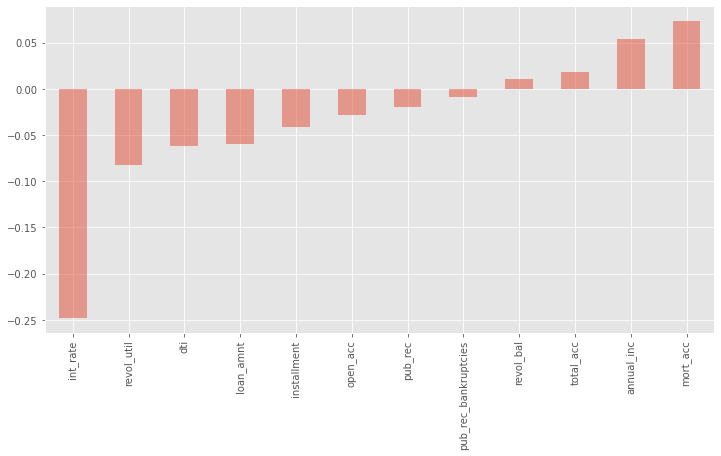

In [669]:
plt.figure(figsize=(12,6))
LendingClub.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind = 'bar', alpha = 0.5)
plt.tight_layout

<br>

## Data Preprocessing

**Missing data**

Checking null values of the data frame

In [670]:
LendingClub.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [671]:
LendingClub.isnull().sum().apply(lambda x:x/len(LendingClub)*100) #Checking percentage

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

We are considering these 2 variable emp_title and emp_length to be removed because of its missing data. Let's check are they significant important

emp_title: the job title supplied by the Borrower when applying for the loan.
emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [672]:
LendingClub['emp_title'].nunique()

173105

In [673]:
len(LendingClub)

396030

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [674]:
LendingClub.drop(columns='emp_title', inplace=True)

Now deal with emp_length

In [675]:
LendingClub['emp_length'].nunique()

11

In [676]:
LendingClub['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

<AxesSubplot:xlabel='emp_length', ylabel='count'>

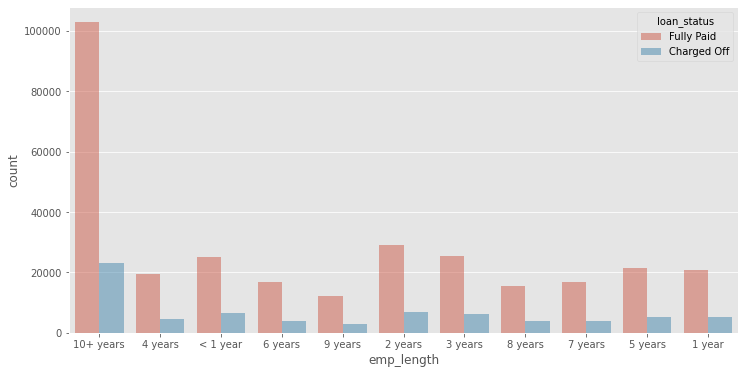

In [677]:
plt.figure(figsize=(12,6))
sns.countplot(data = LendingClub, x = 'emp_length', hue = 'loan_status', alpha = 0.5)

This still doesn't really inform us if there is a strong relationship between employment length and being charged off, let's check the percentage of charge offs per category.

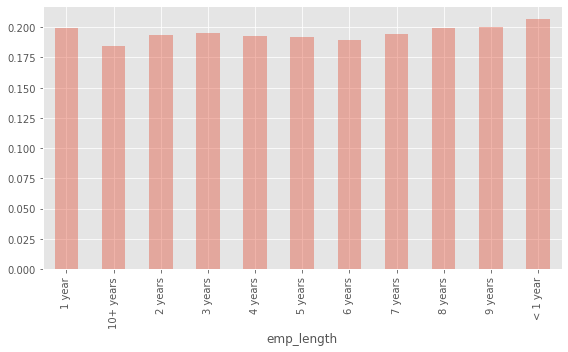

In [678]:
plt.figure(figsize=(8,5))
emp_fp = LendingClub[LendingClub['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_co = LendingClub[LendingClub['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp = emp_co/(emp_co+emp_fp) #Charged off rate
emp.plot(kind = 'bar', alpha = 0.4)
plt.tight_layout()

Charge off rates are significantly similar across all employment lengths. So we can go ahead and drop the emp_length column.

In [679]:
LendingClub.drop(columns='emp_length', inplace=True)

Revisit the DataFrame to see what feature columns still have missing data.

In [680]:
LendingClub.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [681]:
LendingClub['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

The title column is simply a string subcategory/description of the purpose column. Let's drop the title column.

In [682]:
LendingClub.drop(columns='title', inplace=True)

Now deal with column mort_acc (Number of mortgage accounts).

In [683]:
LendingClub['mort_acc'].nunique()

33

In [684]:
LendingClub['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [685]:
LendingClub.corr()['mort_acc'].drop('mort_acc')

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
Name: mort_acc, dtype: float64

We can see there is a significant correlation of mort_acc with total_acc, we can use this column total_acc to apply fillna() for missing values.

In [686]:
mean1 = LendingClub.groupby('total_acc').mean()['mort_acc'].reset_index()
mean1

,total_acc,mort_acc
0,2.0,0.000000
1,3.0,0.052023
2,4.0,0.066743
3,5.0,0.103289
4,6.0,0.151293
...,...,...
113,124.0,1.000000
114,129.0,1.000000
115,135.0,3.000000
116,150.0,2.000000


In [687]:
mean2 = LendingClub.groupby('total_acc').mean()['mort_acc']
mean2[3.0]

0.05202312138728324

In [688]:
LendingClub['mort_acc'] = LendingClub[['total_acc','mort_acc']].apply(lambda x: mean2[x[0]] if np.isnan(x[1]) == True else x[1], axis =1) 


In [689]:
LendingClub.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

Now missing values of mort_acc is filled, let's remove the missing rows of the revol_util and the pub_rec_bankruptcies since they account for less than 0.5% of the total data

In [690]:
LendingClub.dropna(inplace=True)

In [691]:
LendingClub.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Categorical Variables and Dummy Variables

In [692]:
LendingClub.select_dtypes('object').head(0).T #list all the columns that are non-numeric

""
term
grade
sub_grade
home_ownership
verification_status
issue_d
loan_status
purpose
earliest_cr_line
initial_list_status


In [693]:
LendingClub['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [694]:
#Convert the term feature into either a 36 or 60 integer numeric data
LendingClub['term'] = LendingClub['term'].apply(lambda x:36 if x == " 36 months"
                                               else 60)

In [695]:
#We already know grade is part of sub_grade, 
#so just drop the grade feature.
LendingClub.drop(columns= 'grade', inplace=True)

In [696]:
#convert subgrade dummies and concatenate to dataframe
subgrade_dummies = pd.get_dummies(LendingClub['sub_grade'], drop_first=True)
LendingClub = pd.concat([LendingClub.drop(columns='sub_grade'), subgrade_dummies], axis=1)

In [697]:
LendingClub.select_dtypes('object').head(0).T

""
home_ownership
verification_status
issue_d
loan_status
purpose
earliest_cr_line
initial_list_status
application_type
address


**verification_status, application_type,initial_list_status,purpose**

In [698]:

LendingClub['verification_status'].value_counts()

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [699]:
vs_dummy = pd.get_dummies(LendingClub[['verification_status', 'application_type','initial_list_status','purpose' ]], drop_first=True)

In [700]:
LendingClub = pd.concat([LendingClub.drop(columns=['verification_status','application_type','initial_list_status','purpose']),vs_dummy], axis=1)

In [701]:
#home_ownership
LendingClub['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [702]:
LendingClub['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)


In [703]:
home_dummies = pd.get_dummies(LendingClub['home_ownership'], drop_first=True)
LendingClub = pd.concat([LendingClub.drop(columns='home_ownership'), home_dummies], axis = 1)

In [704]:
# address, extract zipcode
LendingClub['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [705]:
zip_code = LendingClub['address'].apply(lambda x: x.split(' ')[-1])

zipcode_dummies = pd.get_dummies(zip_code, drop_first=True)
LendingClub = pd.concat([LendingClub.drop(columns='address'), zipcode_dummies], axis=1)

**issued_d**
This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [706]:
LendingClub.drop(columns='issue_d', inplace=True)

**earliest_cr_line**

The month the borrower's earliest reported credit line was opened.This appears to be a historical time stamp feature. 

In [707]:
LendingClub['earliest_cr_line'][:5]

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [708]:
LendingClub['earliest_cr_line'][:5].apply(lambda x: int(x.split("-")[-1]))


0    1990
1    2004
2    2007
3    2006
4    1999
Name: earliest_cr_line, dtype: int64

In [709]:
#Extract the year
year_ect = LendingClub['earliest_cr_line'].apply(lambda x: int(x.split("-")[-1]))

In [710]:
LendingClub = pd.concat([LendingClub.drop(columns='earliest_cr_line'), year_ect], axis=1)

<br> 

### Creating the Model

<br>

**Train test split** 

In [711]:
LendingClub.drop(columns='loan_status', inplace=True)

In [712]:
X = LendingClub.drop(columns = 'loan_repaid').values
X.shape

(395219, 78)

In [713]:
y = LendingClub['loan_repaid'].values
y.shape

(395219,)

In [714]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Normalizing the Data**

In [715]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Modeling**

In [716]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [717]:
X_train.shape

(316175, 78)

In [718]:
model = Sequential()
model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = 'sigmoid'))

#complie model
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam')


In [719]:
model.fit(X_train, y_train,
         epochs=25,
         batch_size=256,
         validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 5s 3ms/step - loss: 0.2978 - val_loss: 0.2643
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2653 - val_loss: 0.2627
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2629 - val_loss: 0.2621
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2615 - val_loss: 0.2618
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2610 - val_loss: 0.2616
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2600 - val_loss: 0.2615
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2601 - val_loss: 0.2619
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2595 - val_loss: 0.2615
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2592 - val_loss: 0.2615
Epoch 10/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.259

In [720]:
# save model
from tensorflow.keras.models import load_model

In [721]:
model.save('model_Lendingclub.h5')

### Evaluating Model Performance

<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

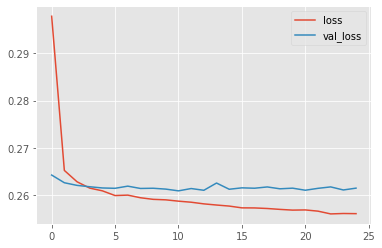

In [722]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(12,8))
losses.plot()

In [723]:
from sklearn import metrics

In [724]:
predicts = (model.predict(X_test) > 0.5).astype("int32")

2471/2471 [==============================] - 3s 1ms/step


In [725]:
predicts

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [726]:
print(metrics.confusion_matrix(y_test, predicts))
print(metrics.classification_report(y_test, predicts))

[[ 6780  8878]
 [   53 63333]]
              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



The model perform a good job in classification with true positive accuracy 88%, f1-score is 0.93 significant close to 1, which tells us that the model does a good job of predicting whether or not a customer paid back the loan.